In [1]:
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread

Using TensorFlow backend.


In [2]:
# create a data generator
datagen = ImageDataGenerator(rescale=1./255)

In [3]:
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('../data/train/', class_mode='binary', batch_size=batch_size, shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate validation dataset
val_it = datagen.flow_from_directory('../data/validation/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))
# load and iterate test dataset
test_it = datagen.flow_from_directory('../data/test/', class_mode='binary', batch_size=64, target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(128, 150, 150, 3), min=0.000, max=0.984


In [6]:
# visualize images from batches
sample_training_images, _ = next(train_it)


def plotImages(images_arr):
    '''This function will plot images in the form of a grid with 1 row and 5 columns where 
    images are placed in each column.'''
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


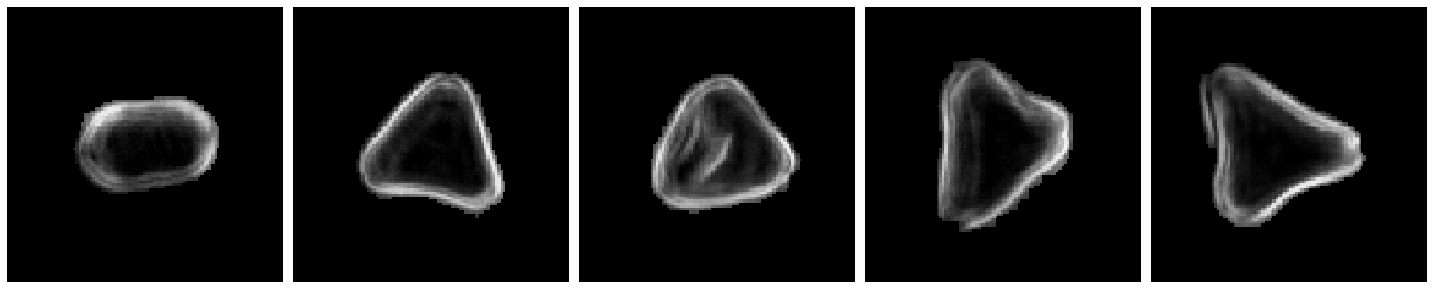

In [7]:
plotImages(sample_training_images[:5])

In [8]:
# Load VGG16 pretrained model
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

In [9]:
# Add adition layers to the pre-trainedmodel
VGG16_MODEL.trainable=False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer =Dense(2, activation='softmax')

In [10]:
# Settle the model 
model_vgg = tf.keras.Sequential([
  VGG16_MODEL,
  global_average_layer,
  prediction_layer
])

In [11]:
# Model compilation
model_vgg.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [13]:
total_train=1800
total_val=200
history_vgg = model_vgg.fit_generator(
    train_it,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_it,
    validation_steps=total_val // batch_size
)

Epoch 1/30
14/14 [==============================] - 624s 45s/step - loss: 0.7922 - accuracy: 0.4797 - val_loss: 0.7225 - val_accuracy: 0.5312
Epoch 2/30
14/14 [==============================] - 609s 43s/step - loss: 0.6905 - accuracy: 0.6094 - val_loss: 0.6525 - val_accuracy: 0.6562
Epoch 3/30
14/14 [==============================] - 582s 42s/step - loss: 0.6304 - accuracy: 0.6406 - val_loss: 0.6029 - val_accuracy: 0.6562
Epoch 4/30
14/14 [==============================] - 509s 36s/step - loss: 0.6069 - accuracy: 0.6727 - val_loss: 0.5681 - val_accuracy: 0.6719
Epoch 5/30
14/14 [==============================] - 553s 40s/step - loss: 0.5762 - accuracy: 0.7048 - val_loss: 0.5451 - val_accuracy: 0.7344
Epoch 6/30
14/14 [==============================] - 521s 37s/step - loss: 0.5534 - accuracy: 0.7321 - val_loss: 0.5144 - val_accuracy: 0.7344
Epoch 7/30
14/14 [==============================] - 470s 34s/step - loss: 0.5170 - accuracy: 0.7494 - val_loss: 0.4919 - val_accuracy: 0.7344
Epoch 

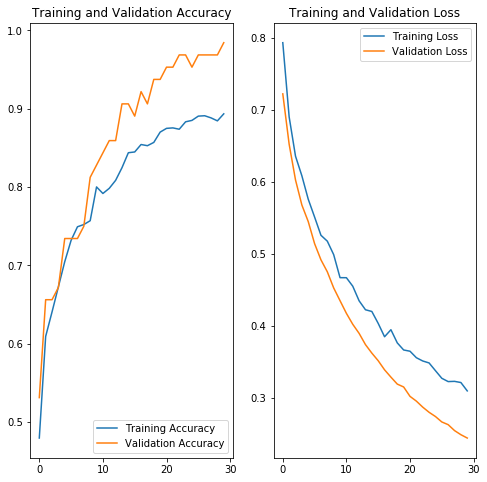

In [14]:
# Visualize training results
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
test_loss, test_acc = model_vgg.evaluate(test_it, verbose=5)

print('\nTest accuracy:', test_acc)